In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_num=train[['Age','SibSp','Parch','Fare']]

In [7]:
df_categorical=train[['Survived', 'Pclass', 'Sex','Ticket', 'Cabin', 'Embarked']]

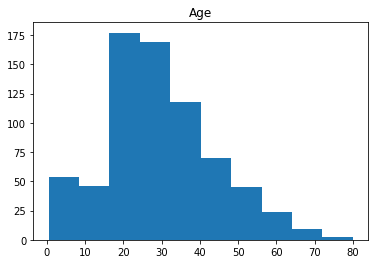

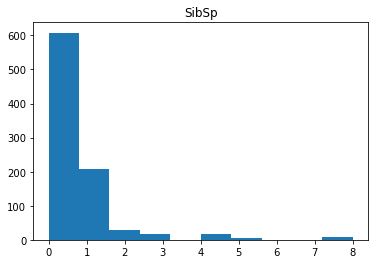

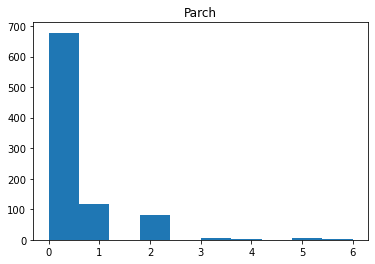

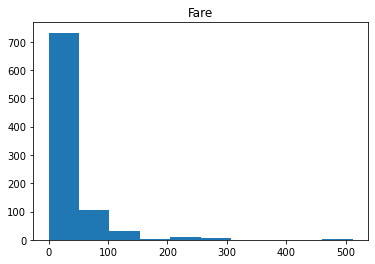

In [8]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

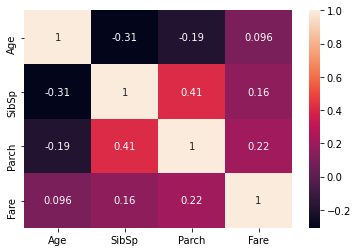

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)

In [10]:
pd.pivot_table(train,index='Survived',values=df_num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


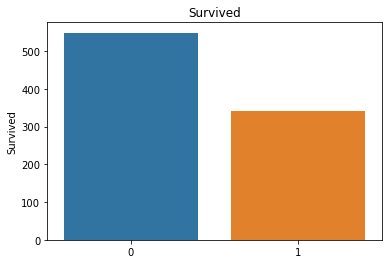

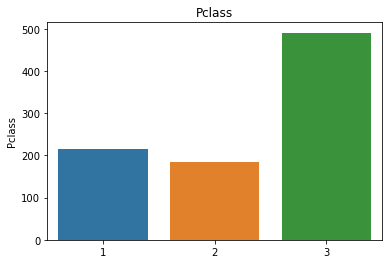

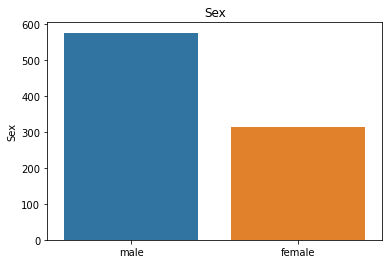

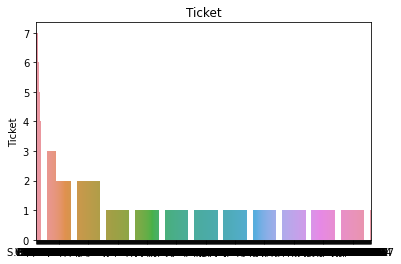

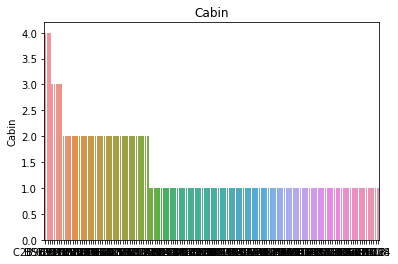

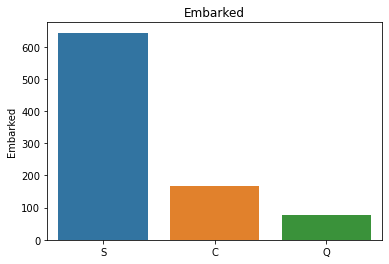

In [11]:
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [12]:
df_categorical.columns

Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
pd.pivot_table(train,index='Survived',values='Ticket',columns='Pclass',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
pd.pivot_table(train,index='Survived',values='Ticket',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [15]:
pd.pivot_table(train,index='Survived',values='Ticket',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [16]:
train['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [17]:
train['cabin_multiple']=train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
pd.pivot_table(train,index='Survived',values='Ticket',columns='cabin_multiple',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
train['cabin_adv']=train.Cabin.apply(lambda x:str(x)[0])

In [20]:
print(train['cabin_adv'].value_counts())
pd.pivot_table(train,index='Survived',columns='cabin_adv',values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [21]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [22]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
pd.set_option('max_rows',None)
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
sotono2        2
swpp           2
scah           2
ppp            2
fc             1
casoton        1
fa             1
sca4           1
scahbasle      1
sp             1
scow           1
sop            1
sc             1
as             1
Name: ticket_letters, dtype: int64

In [24]:
pd.pivot_table(train,index='Survived',columns='numeric_ticket',values='Ticket',aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [25]:
pd.pivot_table(train,index='Survived',columns='ticket_letters',values='Ticket',aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [26]:
train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [27]:
train['Name_title']=train.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [28]:
train['Name_title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [29]:
train['Name_title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Lady              1
 Capt              1
 Jonkheer          1
 Mme               1
 Don               1
 Sir               1
 Ms                1
 the Countess      1
Name: Name_title, dtype: int64

In [30]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
Name_title          0
dtype: int64

In [31]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

In [32]:
all_data=pd.concat([train,test])

In [33]:
all_data['cabin_multiple']=all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv']=all_data.Cabin.apply(lambda x:str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['Name_title']=all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [34]:
all_data.Age=all_data.Age.fillna(train.Age.median())
all_data.Fare=all_data.Fare.fillna(train.Fare.median())

all_data.dropna(subset=['Embarked'],inplace=True)

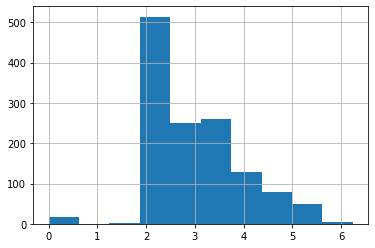

In [35]:
all_data['Norm_Fare']=np.log(all_data.Fare+1)
all_data['Norm_Fare'].hist()

all_data.Pclass=all_data.Pclass.astype(str)

In [36]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple',
       'cabin_adv', 'numeric_ticket', 'ticket_letters', 'Name_title',
       'train_test', 'Norm_Fare'],
      dtype='object')

In [37]:
all_dummies=pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Norm_Fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','Name_title','train_test']])

In [38]:
X_train=all_dummies[all_dummies['train_test']==1].drop(['train_test'],axis=1)

In [39]:
X_train.head(3)

,Age,SibSp,Parch,Norm_Fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_title_ Master,Name_title_ Miss,Name_title_ Mlle,Name_title_ Mme,Name_title_ Mr,Name_title_ Mrs,Name_title_ Ms,Name_title_ Rev,Name_title_ Sir,Name_title_ the Countess
0,22.0,1,0,2.110213,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,4.280593,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,2.188856,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [40]:
X_test=all_dummies[all_dummies['train_test']==0].drop(['train_test'],axis=1)

In [41]:
X_test.head(3)

,Age,SibSp,Parch,Norm_Fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name_title_ Master,Name_title_ Miss,Name_title_ Mlle,Name_title_ Mme,Name_title_ Mr,Name_title_ Mrs,Name_title_ Ms,Name_title_ Rev,Name_title_ Sir,Name_title_ the Countess
0,34.5,0,0,2.178064,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,47.0,1,0,2.079442,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,62.0,0,0,2.369075,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
y_train=all_data[all_data['train_test']==1].Survived
y_train.shape

(889,)

In [43]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple',
       'cabin_adv', 'numeric_ticket', 'ticket_letters', 'Name_title',
       'train_test', 'Norm_Fare'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
all_dummies_scaled=all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','Norm_Fare']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','Norm_Fare']])
all_dummies_scaled

X_train_scaled=all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scaled=all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
gnb=GaussianNB()
cv_gnb=cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv_gnb)
print(cv_gnb.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [47]:
lr=LogisticRegression(max_iter=2000)
cv_lr=cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv_lr)
print(cv_lr.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [48]:
dt=tree.DecisionTreeClassifier(random_state=1)
cv_dt=cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv_dt)
print(cv_dt.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [49]:
knn=KNeighborsClassifier()
cv_knn=cross_val_score(knn,X_train,y_train,cv=5)
print(cv_knn)
print(cv_knn.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [50]:
knn=KNeighborsClassifier()
cv_knn2=cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv_knn2)
print(cv_knn2.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [51]:
rf=RandomForestClassifier(random_state=1)
cv_rf=cross_val_score(rf,X_train,y_train,cv=5)
print(cv_rf)
print(cv_rf.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [52]:
rf=RandomForestClassifier(random_state=1)
cv_rf2=cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv_rf2)
print(cv_rf2.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [53]:
svc=SVC(probability=True)
cv_svc=cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv_svc)
print(cv_svc.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [54]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1,use_label_encoder=False,objective='binary:logistic')
cv_xgb=cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv_xgb)
print(cv_xgb.mean())

[17:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [55]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)],voting='soft')


In [56]:
cv_voting_clf=cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv_voting_clf)
print(cv_voting_clf.mean())

[17:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [57]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc=voting_clf.predict(X_test_scaled).astype(int)
basic_submission={'PassengerId':test.PassengerId,'Survived':y_hat_base_vc}
base_submission=pd.DataFrame(data=basic_submission)

[17:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
base_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#Performance Function
def clf_performance(classifier,model_name):
    print(model_name)
    print('Best Score:'+ str(classifier.best_score_))
    print('Best Parameters:'+str(classifier.best_params_))

In [61]:
lr=LogisticRegression()
param_grid={'max_iter':[2000], 'penalty':['l1','l2'],'C':np.logspace(-4,4,20),'solver':['liblinear']}
clf_lr=GridSearchCV(lr,param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_lr=clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:   12.8s remaining:    0.9s


Logistic Regression
Best Score:0.8279375357074843
Best Parameters:{'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.4s finished


In [62]:
knn=KNeighborsClassifier()
param_grid={'n_neighbors':[3,5,7,9], 'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'p':[1,2]}
clf_knn=GridSearchCV(knn,param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_knn=clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNearestNeighbors')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.0s


KNearestNeighbors
Best Score:0.8279375357074843
Best Parameters:{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.7s finished


In [63]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  9.1min finished


SVC
Best Score:0.8335555132355742
Best Parameters:{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [65]:
rf=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[400,450,500,550], 'criterion':['gini','entropy'],'bootstrap':[True],'max_depth':[15,20,25],
           'max_features':['auto','sqrt',10],'min_samples_leaf':[2,3],'min_samples_split':[2,3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest Classifier')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 14.6min finished


Random Forest Classifier
Best Score:0.8358027042468101
Best Parameters:{'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


In [66]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 10.4min finished
C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score:0.8549101758395226
Best Parameters:{'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [67]:
y_hat_xgb=best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission={'PassengerId':test.PassengerId,'Survived':y_hat_xgb}
submission_xgb=pd.DataFrame(data=xgb_submission)
submission_xgb.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
